# Recording of class
Background: people join from Americas/East Asia

Solution: recording of class
- Will be put on secret youtube links - not searchable
- Delete mid June

Consent: via poll


# Session 5:
## Growing Causal Trees 
### - *Causal Forests and Generalized Random Forests*

*Andreas Bjerre-Nielsen*

## Agenda

1. [Causality](#Causality)
1. [Potential outcomes](#Potential-outcomes)
2. [Experiments](#Experiments)
3. [Matching](#Matching)
    - [Covariate based matching](#Covariate-matching)
    - [Propensity score matching](#Propensity-score-matching)
    
4. [Heterogeneous treatment effects with causal trees](#Causal-trees)
    - [Causal Forest](#Causal-Forest)
    - [Generalized Random Forest](#Generalized-Random-Forest) 
    - [Application of causal forest](#Application-of-causal-forest)


# Buckle up... 

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

# Causality



## Correlation does not imply causation

Spurious or causal?

<br>
<br>

<center><img src='http://www.overthinkingit.com/wp-content/uploads/2008/09/rs-500-us-oil-production1.jpg' alt="Drawing" style="width: 1000px;"/></center>


Figure below is adapted from chapter 5 in Judea Pearl's book titled "Book of Why"

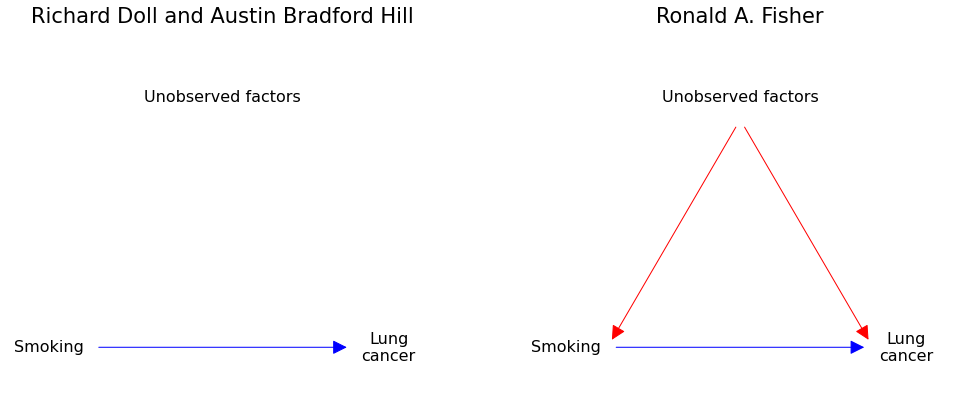

In [2]:
import networkx as nx

plt.rcParams.update({'axes.titlesize': 21})

f_lung_cancer, ax = plt.subplots(1,2,figsize=(17,6.7))
ax[0].set_title('Richard Doll and Austin Bradford Hill')
ax[1].set_title('Ronald A. Fisher')

s,l,g= 'Smoking', 'Lung\ncancer', 'Unobserved factors'
for i in range(2):
    G = nx.DiGraph()
    G.graph['dpi'] = 120
    G.add_nodes_from([s,l,g])
    
    G1 = G.copy()
    G1.add_edges_from([(s,l)])
    nx.draw_networkx_edges(G1,arrowsize=30,ax=ax[i],edge_color='blue',
                           pos = {g: [1,1], s: [0.2,0], l: [1.8,0]})
    
    if i>0:
        G2 = G.copy()
        G2.add_edges_from([(g,l),(g,s)])
        nx.draw_networkx_edges(G2,arrowsize=30,ax=ax[i],edge_color='red',
                               pos = {g: [1,1], s: [0.2,0], l: [1.8,0]})
    
    nx.draw_networkx_nodes(G,node_color='white',node_size=1000,alpha=0,ax=ax[i],
                           pos = {g: [1,1], s: [0,0], l: [2,0]})
    nx.draw_networkx_labels(G,ax=ax[i],font_size=16,                            
                            pos = {g: [1,1.1], s: [-.05,0], l: [2,0]})
    ax[i].axis('off')
    ax[i].set_xlim([-.3,2.3])
    ax[i].set_ylim([-.2,1.4])
    

## What is causality?

Relationship between two or more variables such that whereby a change in one or more variable(s) ***affect(s)*** the distribution of one or more other variable(s).

We can draw these relationships (from The Book of Why, Judea Pearl), e.g. smoking example.
- Ronald Fisher argued that unobserved confounders could cause smoking and lung cancer

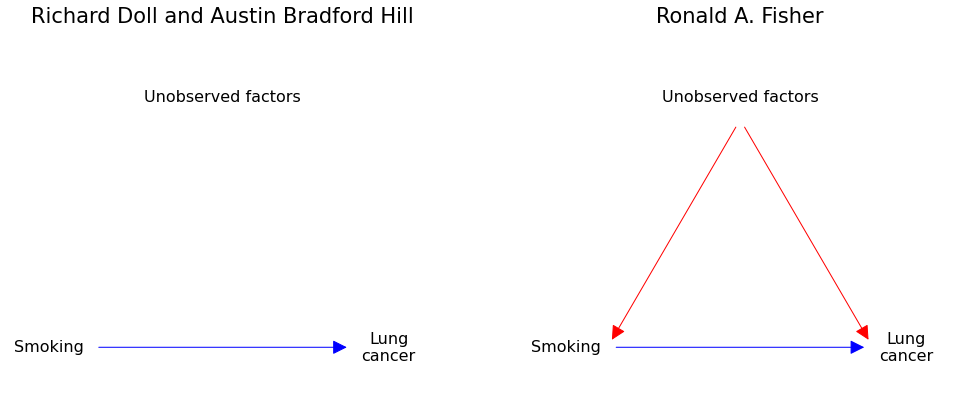

In [3]:
f_lung_cancer

## Establishing causality

Currently there are two broad approaches for establishing causal relationships:

- Experiment and quasi-experiments
    - Corresponds to what is taught in *Mostly Harmless Econometrics*
- Structural equation models 
    - Used for structural econometric choice models etc.
    - Also used estimating causal graphs, e.g. as by Judea Pearl
    

# Potential outcomes

## The aim

We are interested in the effect of some treatment, e.g. 
- getting admitted to a certain educaton on wages, life-expectancy 
- access to paternity leave on wages (husband and wife)






## The Rubin Causal Model 

Denote the treatment variable as $T_i$ where $T_i=1$ corresponds to unit $i$ being treated, while $T_i=0$ is not treated. Define the potential outcomes:

$Y_i=\begin{cases}
Y_i(1), & T_i=1;\\
Y_i(0), & T_i=0.
\end{cases}$



The observed outcome $Y_i$ can be written in terms of potential outcomes as
$$ Y_i = Y_{i}(0) + [Y_{i}(1)-Y_{i}(0)]\cdot T_i$$

$Y_{i}(1)-Y_{i}(0)$ is the *causal* effect of $T_i$ on $Y_i$. 

But we never observe the same individual $i$ in both states. This is the **fundamental problem of causal inference**. 

## Selection Bias

We need some way of estimating the state we do not observe (the ***counterfactual***)

Usually, our sample contains individuals from both states - treated and untreated.

So why not do a naive comparison of averages by treatment status? i.e. $E[Y_i|T_i = 1] - E[Y_i|T_i = 0]$

## Selection Bias II
We can rewrite into:
\begin{align}
\nonumber E[Y_i|T_i = 1] - E[Y_i|T_i = 0] = &E[Y_i(1)|T_i = 1] - E[Y_i(0)|T_i = 1] + \\
 \nonumber  &E[Y_i(0)|T_i = 1] - E[Y_i(0)|T_i = 0] 
\end{align}


The decomposition:

 - $E[Y_i(1)|T_i = 1] - E[Y_i(0)|T_i = 1] = E[Y_i(1) - Y_i(0)|T_i = 1]$: the average *causal* effect of $T_i$ on $Y$. 

- $E[Y_i(0)|T_i = 1] - E[Y_i(0)|T_i = 0]$: difference in average $Y_i(0)$ between the two groups. Likely to be different from 0 when individuals are allowed to self-select into treatment. Often referred to as ***selection bias***. 

# Experiments

## Random assignment solves the problem

Random assignment implies $T_i$ is independent of potential outcomes

- Selection bias term is zero: $E[Y_{i}(0)|T_i = 1] = E[Y_{i}(0)|T_i = 0]$ 

- Intuition: non-treated individuals can be used as counterfactuals for treated (*what would have happened to individual $i$ had he not received the treatment*?)

- Overcome the fundamental problem of causal inference


## Randomization

Holland and Rubin (1986)

> no causation without manipulation


As mentioned, we need to worry when individuals are allowed to self-select

- A lot of thought has to go into the *randomization phase*.

- Randomization into treatment groups has to be manipulated by someone.


## Randomized Controlled Trials

*Randomized controlled trials (RCT)*: randomization done by researcher

- Survey experiments
- Field experiments

Note: difficult to say one is strictly better than the other. Randomization can be impractical and/or unethical. 


## An alternative to experiments

*Quasi-experiments*: randomization happens by "accident"

- Matching (*today*)
- Differences in Differences
- Regression Discontinuity Design
- Instrument variables


# Matching


## The what and why of matching

**What** - we construct counterfactual potential treated and control units. 
- We *match* observations across treatment and control based on similarity. 

**Why** -  matching control for used covariates 
- excludes (observable) confounders 
- may improve precision of treatment estimate of experiments (less variance)

Note: An alternative to matching is to using regression - basically same idea.

Problem: 
- matching does not unconfound generally!!
- unobserved factors may still confound 

## The how of matching

We use a set of covariates $X$ for matching.

Two core ideas:
- We match on covariates 
    - We require sufficient similarity by some metric over covarities
- We match on propensity    
    - We require sufficient similar probability of treatment (prediction)


# Covariate based matching



## Exact matching


 We match a treatment $i$ obs. with control obs. $j$ if 
 - $X_i=X_j$, i.e. they are exactly identical, 
 - $||X_i-X_j||_2=0$, i.e. zero Euclidian distance
 

## Treatment effects


We can compute the Average Treatment Effect (ATE) 

- For treatment obs. $i$ the counterfactual outcomes $Y_i(0)$ are the average of control $j$ where $X_j=X_i$.
- For control obs. $i$ the counterfactual outcomes $Y_i(1)$ are the average of treatment $j$ where $X_j=X_i$.

We can also compute treatment effects only for treament observations, known as Average Treatment Effect on the Treated (**ATT** or **ATET**).

## Balance of match

What happens if some observations are not matched?
- We get biased estimates!
- We not to check whether the match is balanced
    - Problem, exact matching usually leads to very few matches.

## Example of exact matching 


Aim: understand whether traning program affects wages. 

We have covariates and outcomes treatment and controls. (synthetic data from Scott Cunninghams's "Causal Inference - The Mixtape" book)

In [6]:
scuse = 'https://storage.googleapis.com/causal-inference-mixtape.appspot.com/{0}.dta'
df = pd.read_stata(scuse.format('training_example')).replace('',np.nan)
arr = df.values[:20].astype('float')
X_cntrl, y_cntrl = arr[:20,4:5], arr[:20,5]
X_treat, y_treat = arr[:10,1:2], arr[:10,2]

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


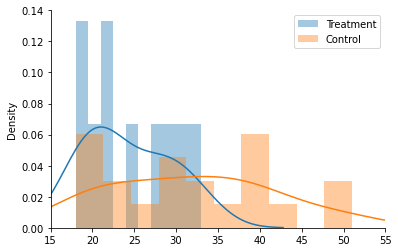

In [7]:
f,ax = plt.subplots()
sns.distplot(X_treat, bins=10, label='Treatment', ax=ax)
sns.distplot(X_cntrl, bins=10, label='Control', ax=ax)
ax.legend()
ax.set_xlim(15,55)
sns.despine(f)
f.savefig('fig/balance_labor.png',dpi=300)

## Example of exact matching (2)

We have only one dimension of covariate so we can easily check the balance.
- Problem no counterfactuals for control!!

<center><img src='fig/balance_labor.png' alt="Drawing" style="width: 800px;"/></center>



## Example of exact matching (3)

We can match exactly using `RadiusNeighborsRegressor` with zero radius.
- OBS: in econometrics this radius is often known as a caliper 

In [18]:
from sklearn.neighbors import RadiusNeighborsRegressor as RNR

impute_t_exact = RNR(radius=0).fit(X_cntrl, y_cntrl).predict(X_treat)
impute_c_exact = RNR(radius=0).fit(X_treat, y_treat).predict(X_cntrl)
impute_c_exact

One or more samples have no neighbors within specified radius; predicting NaN.


array([10000., 11750., 10250.,    nan,    nan, 12250.,    nan, 13250.,
       11000., 12500., 13250.,    nan, 10500.,  9500.,    nan,    nan,
        9750., 12500.,    nan,    nan])

## Exact matching (4)

We can compute unbiased estimate of ATT:

In [9]:
print(y_treat.mean(), y_cntrl.mean() )
diff = y_treat - impute_t_exact
print(f'ATT: {round(diff.mean(),1)} ± {round(diff.std()*1.96,1)}')

11075.0 11101.25
ATT: 1695.0 ± 646.7


## Other covariate based matching

We can extend exact matching in several ways

- Coarsened Exact Matching: 
    - where continuous variables are split into blocks
    - very popular for experiments
- Radius / Caliper matching
- Nearest neighbor matching

We can also have different metrics:
- Euclidian
- Mahalanobis distance ($=(X-\bar{X})^TCOVAR(X)(X-\bar{X}) $)

Note that approximate matching on covariates may introduce other biases, see [Abadie and Imbenes (2011)](https://doi.org/10.1198/jbes.2009.07333).


# Propensity score matching


## Predicting treatment status

Alternative way of match on likelihood of treatment.

Procedure: 
1. estimate a model that predicts treatment 
2. match with observations of similar treatment likelihood
    - (use match function, e.g. nearest neighbor, caliper)
3. compute counterfactual outcomes for treatment and control
4. (possibly adjust for differences in observed covariates)
5. compute ATE

## Uncoundedness property

[Rosenbaum and Rubin (1983)](https://doi.org/10.1093/biomet/70.1.41) show that propensity score matching will unconfounded:
- can serve as an unbiased estimator of the average treatment effect
- endows non-experimental data with experimantal qualities

Critical requirement - conditional independence assumption (**CIA**): 
- same as no unobserved confounders 
- often CIA is violated 
  - e.g. causal effect of taking education with registry data - many unobserved factors
  

## Summary - matching

Useful tool, but requires that we know all relevant factors 
- can be useful to minimize variance of experimental estimates
- problem in observational studies - often there are unobserved confounders and selection

If we think there is selection effects or endogeneity:
- Use quasi-experimental methods which can handle this, e.g. diff-in-diff or regression discontinuity

# Causal trees


## Average Joe
Suppose, we have credible measures of average treatment effect, $\tau$. 

Can we get personalized estimates? 

- Measure whether certain groups are affected differently by our new school policy
    - e.g. boys vs. girls, natives vs. immigrants
- Some react positively to one kind of information, others to another


## Beyond average Joe

Conditional Average Treatment Effects (CATE)

- Treatment effect for given characteristics $x$
    - $\tau(x) = \mathbb{E}[Y_i(1)-Y_i(0)|X=x]$
    
Methods exist, e.g. use regression analysis.    

But.. **True model is unknown**..!

- May need to test model on data.
- Can lead to conclusions based on data mining (dangerous!!)

## Being dishonest with you

An adaptive, data driven approach

- use all data for training decision tree
    - partitions X into categories based outcome similarity
    - enough treatment and control in each leaf
- then estimating treatment effects in partitions
    - measure treatment effects in each partition group (=leaf in tree model)

**Quiz**: is this different from propensity scores?

- Propensity scores has treatment assignment $T_i$ as target.

- The adaptive approach uses outcome $y_i$ as target.

## Getting honest with you

Could we use out-of-sample intuition? 

[Athey and Imbens (2016)](https://doi.org/10.1073/pnas.1510489113) suggest to let data speak **honestly**: 
- half of sample ($\mathcal{S}^{tr}$) for training decision tree
    - partitions X into categories based outcome similarity
    - enough treatment and control in each leaf
- other half ($\mathcal{S}^{est}$) for estimating treatment effects 
    - measure treatment effects in each partition group (=leaf in tree model)


This is similar to splitting into train and test
- prevents data-leakage
- allows honest evaluation of model performance! 


## Core assumption

Potential outcomes and treatment assignment are unconfounded given covariates 

\begin{equation*}
T_i \,\perp\!\!\perp\, (Y_i(1), \,Y_i(0))\,\, | \,\, X
\end{equation*}

- where $\perp\!\!\perp$ is a symbol  for conditional independence (strong assumption!!)
- recall from earlier
    - always holds for experiments
    - or propensity scores (note: assumption cannot be tested)

## Modified splitting procedure

The usual way of training decision trees is Classification And Regression Trees (CART).

- Splits leaves repeatedly based on criteria (e.g. entropy, MSE)
- We can put in restriction, e.g. depth of trees (hyperparameters)

Causal trees 
- new criteria: 
    - expected MSE (in hypothetical test set): $\mathbb{E}[\underset{=MSE}{\underbrace{(Y_i-\bar{Y}_i)^2}} - Y_i^2]$
    - idea: new term $Y_i^2$ penalizes small leaves 
- note: same ranking as MSE, matters for properties

## Modified splitting procedure

The usual way of training decision trees is Classification And Regression Trees (CART).

- Splits leaves repeatedly based on criteria (e.g. entropy, MSE)
- We can put in restriction, e.g. depth of trees (hyperparameters)

Causal trees 
- criteria: $\mathbb{E}[(Y_i-\bar{Y_i})^2 - Y_i^2]$
- note: same ranking as MSE, matters for properties

## Inference

Partioning of the covariate data works like coarsened matching!

- Estimate average treatment effects locally for each group/leaf
- Corresponds to local matching!

## Inference - validation

[Athey and Imbens (2016)](https://doi.org/10.1073/pnas.1510489113) performs a simulation study under various scenarios. 

Main take-away: **honest** outperforms **adapative** (convential CART).

<br>

<center><img src='https://raw.githubusercontent.com/abjer/sds_eml_2020/master/material/session_4/athey_imbens_ct.png' alt="Drawing" style="width: 400px;"/></center>




## Summary - causal trees

Leverage machine learning idea: 
- Heterogeneity is estimated separate from treatment effects.
- New scoring function makes smaller leafs.
- Outperforms adapative procedure

Main advantage 
- Structure of heterogeneity from data.
- Can be part of pre-analysis plan - only one solution (given split of data!).



# Recap on Random Forest

## The  forest full of trees

What is the difference between a Decision Tree and a Random Forest?

- Decision tree iteratively splits data into subsets (partitions) and calculates mean outcome in leaves (end of splits)
- Minimize on some criteria, often entropy or similar loss function
- Collection/ensemble of decision trees
  - Subset of data by bootstrap (sampling with replacement)
  - Subset of features

<center><img src='https://p1.pxfuel.com/preview/386/193/136/forest-of-rugen-trees-beech-wood-nature-deciduous-forest-rest-national-park.jpg' alt="Drawing" style="width: 680px;"/></center>






## A special tree 

So what distinguishes a Causal Tree from a Decision Tree?

- Causal tree estimates partition of data where treatment effects can be computed locally 
- In order to have valid estimates we need **honesty** of trees by estimating partitions and treatment effects on different subsets of data
  - Analogy to train / test split


<br>
<br>

<center><img src='https://live.staticflickr.com/2880/33000342484_8681f68a01_b.jpg' alt="Drawing" style="width: 600px;"/></center>


## A tradeoff in structure of heterogeneity


Two approaches? 

- Data driven heterogeneity
  - Based on causal trees etc.
- A priori sensible heterogeneity 
  - e.g. gender, socioeconomic, ethnicity
  - we use regression model and have interaction with desired variable

When to choose which?
- Choose data driven heterogeneity for policy where you want to maximize impact given data (no theory)
- If we want to test whether certain subgroups are adversely affected

## Limitations of Decision Trees 


Random forests are nice but no asymptotic normality of prediction.

- Crucial for inference! (corresponds to MLR6 in Econometrics 1)

- Also holds for causal trees



# Random forest for inference and treatment effecs

## Causal  Trees

The goal of causal trees is to establish unbiased, consistent estimates of heterogeneous treatment effects
- also known as conditional average treatment effects (**CATE**)
- the effect size is denoted $\hat{\tau}(x)$;
- standard tools for inference, e.g. using statistical tests locally










## Causal Forest 

What is the output from the decisions trees? Each tree produces a partitioning of the feature space $X$. Example of three trees:

<center><img src='partitions.JPG' alt="Drawing" style="width: 1000px;"/></center>

(from [Athey, Wager, Tibshirani, 2019](https://doi.org/10.1214/18-aos1709))

## Double Sample Trees 

For Causal Trees

- first half ($\mathcal{J}$, $|\mathcal{J}|=\lceil s / 2\rceil$)
  - training Decision Tree
    - minimize adjusted MSE 
    - require at least $k$ observations for both treatment and control in all leaves of $\mathcal{I}$-sample
- other half  ($\mathcal{I}$, $|\mathcal{I}|=\lfloor s / 2\rfloor$)
  - estimating treatment effects, $\hat{\tau}(x)$

## Double Sample Trees (2)

For Regression Trees 

- first half ($\mathcal{J}$, $|\mathcal{J}|=\lceil s / 2\rceil$)
  - training Decision Tree
    - minimize MSE / Gini etc.
    - require at least $k$ observations in all leaves of $\mathcal{I}$-sample
- other half  ($\mathcal{I}$, $|\mathcal{I}|=\lfloor s / 2\rfloor$)
  - estimating outcome, $\hat{\mu}(x)$


**Quiz:** How is this different from normal Decision Trees for regression problems?


- Unlike normal decision trees outcomes are estimated honestly.


## Main results: econometric properties (1)

[Wager and Athey (2017)](https://doi.org/10.1080/01621459.2017.1319839) show 
 - We can estimate the variance of CATE
 - $\hat{V}_{IJ}(x)=\frac{n-1}{n}\left(\frac{n}{n-s}\right)^{2} \sum_{i=1}^{n} \operatorname{Cov}_{*}\left[\hat{\tau}_{b}^{*}(x), N_{i b}^{*}\right]^{2}$

## Main results: econometric properties (2)

From Theorem 4.1 in [Wager and Athey (2017)](https://doi.org/10.1080/01621459.2017.1319839)

- The conditional average treatment estimates are unbiased and consistent
  - unbiased: no systematic error of measurement
  - consistency: with more data our estimate approaches true value 

- Moreover, we can do inference:
  - The variance estimator $\hat{V}_{IJ}(x)$ is consistent.
  - Treatment effect estimates are asymptotic normal and unbiased
    - $(\hat{\tau}(x)-\tau(x)) / \sqrt{\operatorname{Var}[\hat{\tau}(x)]} \Rightarrow \mathcal{N}(0,1)$

Caveat: only works for evaluating treatment effects in one point $x$! Do not perform multiple tests.

## Useful forests

Two more procedures

1. Double Sampled Trees
  - using Regression trees for predicting outcome (=$\hat{\mu}(x)$)
1. Propensity Trees
  -  using propensity trees for propensity score matching
 
 

What is the shared procedure? 
- Each tree is estimated using repeated subsampling (**no replacement**)
  - Constrast to bootstrap aggregation in random forest (sample **with replacment**)
- Random subsample of features  

## More results 

[Wager and Athey (2017)](https://doi.org/10.1080/01621459.2017.1319839) show that the same properties of Double Sample Trees using causal trees also hold analogously for regression trees. 
- Random forests  have the property of being asymptotic normal and can thus be used for inference
- Similar intuition as idea of nested CV where we could do inference

## Simulation experiment

[Wager,  and Athey (2017)](https://doi.org/10.1214/18-aos1709) compare causal forest to nearest neighbor methods

- random forest is kind of local nearest neighbor estimate
- based on work by Lin and Jeon (2006).

## Simulation (1) 

- simulation setup: no treatment effect, only confounding factors
- method: propensity trees 
- comparison of estimated treatment effects  
    - lower MSE and better coverage
    - coverage falls for increasing number of variables $d$

<center><img src='cf_tab1.JPG' alt="Drawing" style="width: 700px;"/></center>

(from [Athey, Wager, Tibshirani, 2019](https://doi.org/10.1214/18-aos1709))

## Simulation (2) 

- setup: heterogeneous treatment effect, **no** confounding factors

- comparison of estimated treatment effects
    - lower MSE and better coverage
    - coverage falls for increasing number of variables $d$

<center><img src='cf_tab2.JPG' alt="Drawing" style="width: 700px;"/></center>

(from [Athey, Wager, Tibshirani, 2019](https://doi.org/10.1214/18-aos1709))

## Alternatives to compute heterogeneous treatment effects 


There are some existing and new frameworks for estimating heterogeneous treatment effects. For instance BART is already quite established and often outperforms GRF.

- [Chipman, George and McCulloch (2010)](https://doi.org/10.1214/09-aoas285) develops Bayesian Additive Regression Trees (BART)


- [Künzel et al. (2019)](https://doi.org/10.1073/pnas.1804597116) investigates more general class of prediction tools for partitioning data using 

  - Lower EMSE in many cases relative to CF/GRF and BART 
  
- [Nie and Wager (2017)](https://arxiv.org/pdf/1712.04912.pdf) investigates another class of methods called R-learners that leverages a smart representation of CATE.

## Round-up causal forest

Summary of [Wager and Athey (2017)](https://doi.org/10.1080/01621459.2017.1319839) 
- builds on Causal Trees method
- strong econometric properties
  - unbiased and consistent
  - asymptotic normality given $x$
      - causal and regression forest allows inference!
- problem: 
  - must choose focus 
    - unconfounding (propensity) or 
    - estimate CATE
  - coverage was not good, especially for higher $d$!
  



# Generalized Random Forest

## A higher aim

Causal forests are pretty cool. Can we use our honest procedure more generally? 

- Estimate any quantity $\theta(x)$ identified via local moment conditions, e.g.
  - simultaneously unconfound and find heterogeneity?
  - find heterogeneous treatment effects from IV estimation?

## Estimating equations
The general estimating equation
  - $\mathbb{E}\left[\psi_{\theta(x), \nu(x)}\left(O_{i}\right) | X_{i}=x\right]=0, \quad \forall x.$
    
Where $\psi$  estimating function, maps parameters and data into moment equations
  - Parameters
    - $\theta$ parameter we want estimate 
    - $\nu$ is nuisance we want to "partial out" (optional)
  - Data     
    - $O_i$ main objects we are interested in modelling, e.g. $Y_i, T_i$
    - $X_i$ covariates


## Estimating equations

What is a moment condition?



- Similiar to solution to first order condition
- More general - can incorporate extra restrictions (e.g. unconfounding)

## Estimating equations

Suppose we want to estimate conditional average treatment effects

Functional form: $\psi_{\beta(x),c(x)}=Y_i-\beta(x)W_i-c(x) \left(1 \quad W_{i}\right)$ where
  - $\beta$ is treatment effect
  - $c$ is nuisance parameter

## Using a kernel

Kernel methods can be used to unconfound and compute heterogeneous effects simulateneously


- Problem how to decide weights? 



<center><img src='partitions_weights.JPG' alt="Drawing" style="width: 1000px;"/></center>


(from [Athey, Wager, Tibshirani, 2019](https://doi.org/10.1214/18-aos1709))

## The Generalized Random Forest

[Athey, Wager, Tibshirani (2019)](https://doi.org/10.1214/18-aos1709) show that kernel weights can be estimated using forest methods

- can be adapted for different purposes
  - quantile regression
  - heterogeneous treatment effects
  - instrumental variables

## The Generalized Random Forest (2)

[Athey, Wager, Tibshirani (2019)](https://doi.org/10.1214/18-aos1709) use a procedure as follows:

1. Use estimating equation, $\psi$ to estimate tree splits iteratively on subsample. 
2. View forests as a weights of similar neighbors
    - Amount of partitions where observations 
  \begin{equation}\alpha_i(x)=\frac{1}{B}\sum_{b=1}\frac{\mathbb{1}(X_i\in L_b(x))}{|L_b(x)|}\end{equation}
3. Re-estimate $\psi$ using weights on entire sample.

Difference from Causal Forest - trees are used for constructing weights!

## Computing weights $\alpha$

Given a subsample $\mathcal{I}$ of data.

1. Split subsample $\mathcal{I}$ into $\mathcal{J}_1,\mathcal{J}_2$
1. Estimate trees on $\mathcal{J}_1$
  1. Compute estimating equations on subsample at each parent node (before split)
  1. Evaluate different splits - use approximate solutions with gradients
1. Estimate weights using forests on $\mathcal{J}_2$.
  \begin{equation}\alpha_i(x)=\frac{1}{B}\sum_{b=1}\frac{\mathbb{1}(X_i\in L_b(x))}{|L_b(x)|}\end{equation}
    - where $L_b(x)$ training examples falling in the same leaf as x

## Overall procedure

1. Repeatedly estimate trees where splits are based on estimating equation, $\psi$ to obtain weights $\alpha$. 
1. Re-estimate $\psi$ using weights on entire sample where forests splits are weights.

## Estimating equations

Given $x$ compute the ***local*** estimating equations using weights $\alpha_i(x)$ on entire sample:

\begin{equation}
(\hat{\theta}(x), \hat{\nu}(x)) \in \operatorname{argmin}_{\theta, \nu}\left\{\left\|\sum_{i=1}^{n} \alpha_{i}(x) \psi_{\theta, \nu}\left(O_{i}\right)\right\|_{2}\right\}
\end{equation}

Example of applications in Athey et al. (2019)
- Conditional Average Treatment Effects
- Instrumental Variables
- Quantile Regressions


## Estimation equations for CATE

What does the local estimating equation look like under CATE?

- the estimating equations $\psi$ with possibly multi-dimensional treatments 
<br>
<br>
\begin{align}\psi_{\beta(x), c(x)}\left(Y_{i}, W_{i}\right)=\left(Y_{i}-\beta(x) \cdot W_{i}-c(x)\right)\left(1 \quad W_{i}\right)\end{align}
<br>
- Note: $\left(1 \quad W_{i}\right)$ which implies there is a vector of equations
  

## Estimation equations for CATE (2)

What is the solution?
- Run local regression of $y_i$ on $W_i$ with weights $\alpha$
  
\begin{align}\hat{\theta}(x)=\xi^{\top}\left(\sum_{i=1}^{n} \alpha_{i}(x)\left(W_{i}-\bar{W}_{\alpha}\right)^{\otimes 2}\right)^{-1} \sum_{i=1}^{n} \alpha_{i}(x)\left(W_{i}-\bar{W}_{\alpha}\right)\left(Y_{i}-\bar{Y}_{\alpha}\right)\end{align}

## Main results 

Athey et al (2019) show that Generalized Random Forests have the following propeties:

- Estimates, $\hat{\theta}(x)$, are consistent (Theorem 3)
- Asymptotic normality of estimates (Theorems 5,6)

# Application of causal forest

## Note about software

Use `econml` implementation 

- Not implementation of generalized random forest
- Uses double machine learning to unconfound data
- Caution:
  - If you want to use in research - use GRF package by Athey et al.

## Make synthetic data

In [10]:
import numpy as np

n, p = 1000, 10
X = np.random.RandomState(0).randn(n,p)
P = 0.4 + 0.2 * (X[:, 0] > 0)
T = (np.random.rand(n) > P).astype('float')
Y = np.max([X[:, 0] * T, np.zeros(n)],0) + \
    X[:, 1] + np.max([X[:, 2] * T, np.zeros(n)],0)

## Apply  causal forest from `econml`

Note - we use double maching learning here to unconfound treatment assignment and control for confounders of outcome

In [11]:
t0,t1 = 0,1
from econml.dml import CausalForestDML
from sklearn.ensemble import GradientBoostingRegressor
est = CausalForestDML(model_y=GradientBoostingRegressor(),
                      model_t=GradientBoostingRegressor())
est.fit(Y, T, X=X, W=X)

## Getting predicted treatment effects for x range

In [12]:
n_plot = 1000
X_range = np.zeros([n_plot,p])
X_range[:,0] = np.linspace(-2,2,n_plot)
Y_dgp = np.max([X_range[:, 0] * np.ones(n_plot), np.zeros(n_plot)],0) + X_range[:, 1] + np.max([X_range[:, 2] * np.ones(n_plot), np.zeros(n_plot)],0)

tau_hat = est.effect(X_range, T0=t0, T1=t1)
tau_lb, tau_ub = est.effect_interval(X_range, T0=t0, T1=t1, alpha=0.05)

## Plotting treatment effects

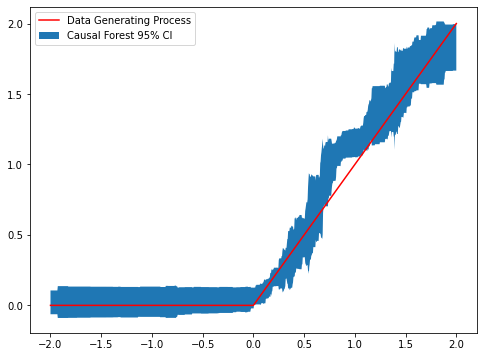

In [16]:
from matplotlib import pyplot as plt
%matplotlib inline
f,ax = plt.subplots(figsize=(8,6))
ax.plot(X_range[:,0], Y_dgp, color='red', label='Data Generating Process')
# plt.plot(X_range[:,0], tau_hat)
ax.fill_between(X_range[:,0], tau_lb, tau_ub, label="Causal Forest 95% CI")
ax.legend()

# Comparison 
### Causal Forests and Generalized Random Forests

## Causal Trees and Forests
Strong econometric properties
- unbiased and consistent (trees and forests)
- asymptotic normality given $x$ (forests)

- weaknesses: 
  - either unconfounding or heterogeneity
  - we "use" data to buy honesty at the price of statistical power
      

## Generalized Random Forest 
Difference from Causal Forest - trees are used for constructing weights!
- strengths: 
  - unconfounding (propensity) *AND* heterogeneity
  - additional uses 
      - quantile regression
      - instrumental variables  
      - clustered standard errors
      - and more
- weakness: 
  - we "waste" data on honesty